<a href="https://www.kaggle.com/code/whitewhistle22116026/akinator?scriptVersionId=124110550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [201]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pl
%matplotlib inline
data= pd.read_csv('/kaggle/input/anime-traits-bett/anime_traits.csv')
data.head()


,Id,Names,Hair_Color,Gender,Actor,Adult,Afro,Agent of the Afterlife,Airhead,Alchemist,...,Widow,Wind Powers,Wings,Witch,Wolf,Writer,Yamato Nadeshiko,Youkai,Yuki-onna,Zombie
0,0,L,Black Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Kakashi HATAKE,Grey Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Edward ELRIC,Blonde Hair,Male,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Levi,Black Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Light YAGAMI,Brown Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
data1=pd.read_csv("/kaggle/input/definition/defutf.csv")
!pip install torch==1.4.0
!pip install transformers==2.9.0
!pip install pytorch_lightning==0.7.5
data1.dropna(axis=0,inplace=False)

,Id,trait,def
0,0,Actor,Actors and actresses are those who perform on ...
1,1,Adult,Adults are characters that are between the age...
2,2,Afro,"These characters sport an Afro, a large, round..."
3,3,Agent of the Afterlife,These characters perform a job for their emplo...
4,4,Airhead,Ever seen a character and wondered just how th...
...,...,...,...
418,418,Yamato Nadeshiko,A Yamato Nadeshiko is the stereotypical perfec...
419,419,Youkai,Youkai are Supernatural spirits that originate...
420,420,Yuki-onna,The Yuki-onna is a Youkai that's known to appe...
421,421,Zombie,"Zombies can take many forms: from slow, shuffl..."


In [203]:
data.head()

,Id,Names,Hair_Color,Gender,Actor,Adult,Afro,Agent of the Afterlife,Airhead,Alchemist,...,Widow,Wind Powers,Wings,Witch,Wolf,Writer,Yamato Nadeshiko,Youkai,Yuki-onna,Zombie
0,0,L,Black Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Kakashi HATAKE,Grey Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Edward ELRIC,Blonde Hair,Male,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Levi,Black Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Light YAGAMI,Brown Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
a=data['Names']
b=data.drop(['Names'],axis=1)
c=pd.get_dummies(b)

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
dt_model=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [207]:
y=c['Id']
x=c.drop(['Id'],axis=1)
i=0
ar=[]
for col in x.columns:
     ar.append(col)

In [208]:
dt_model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

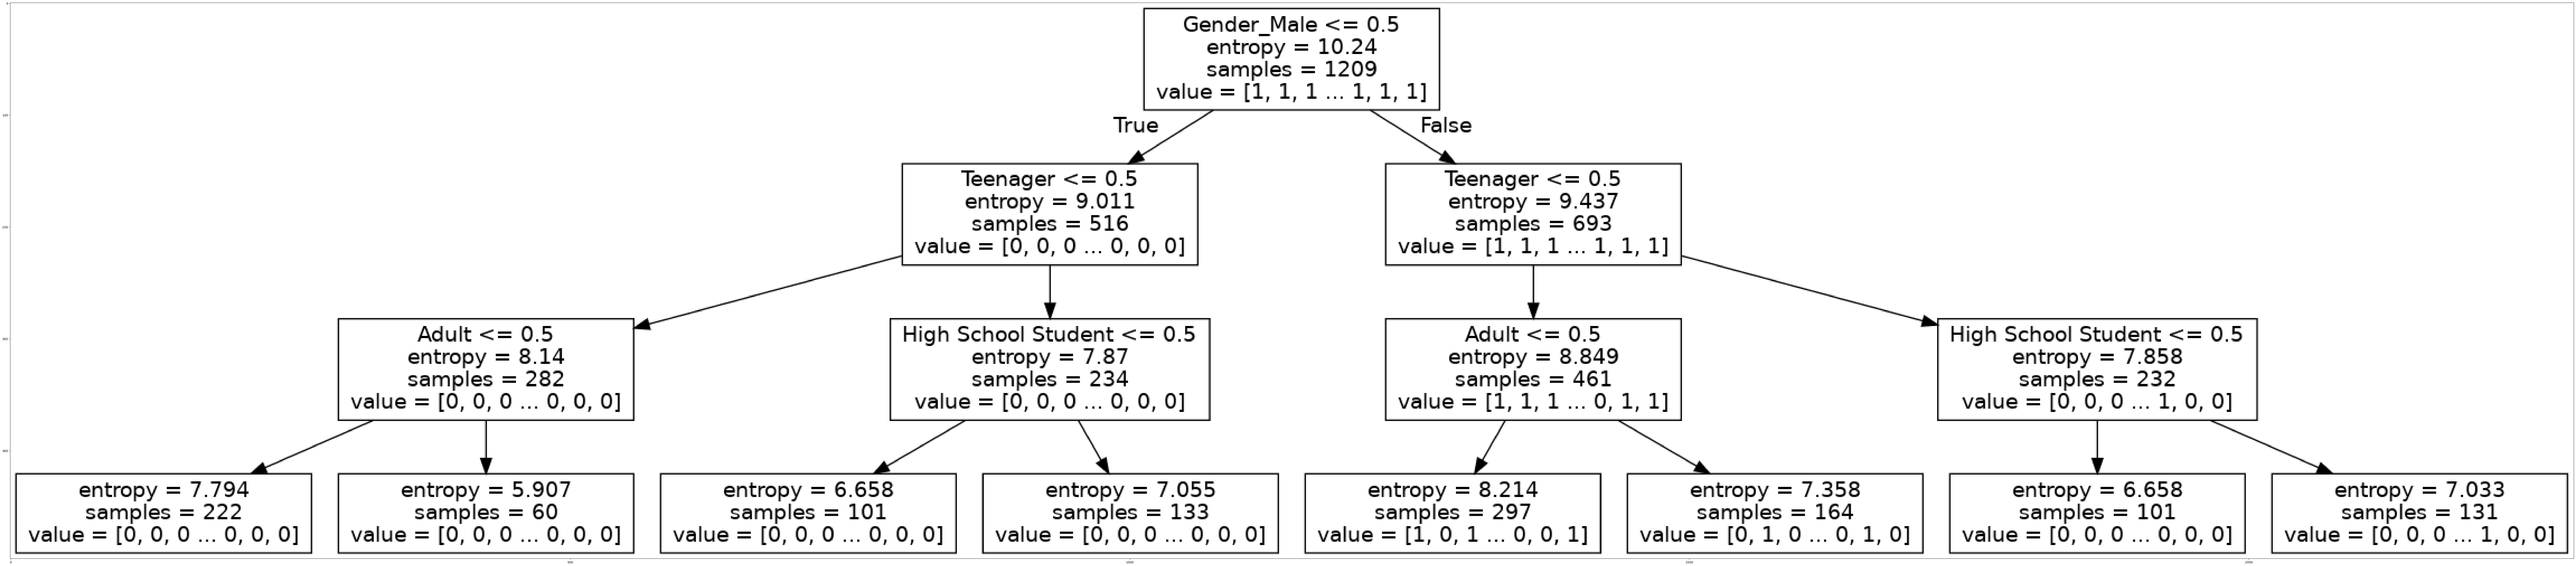

In [209]:
from sklearn import tree
!pip install graphviz
decision_tree=tree.export_graphviz(dt_model,out_file="tree.dot",max_depth=3,feature_names=x.columns,filled=True)
!dot -Tpng tree.dot -o tree.png
image=pl.imread('tree.png')
pl.figure(figsize=(150,150))
pl.imshow(image)

In [210]:
dt_model.score(x,y)

0.006617038875103391

In [211]:
#c.drop(x[x['Gender_Male'] == 1].index, inplace=True)
#c=c.drop(['Gender_Male'],axis=1)
#y=c['Id']
#x=c.drop(['Id'],axis=1)

In [212]:
dt_model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [213]:
from sklearn import tree
!pip install graphviz
decision_tree=tree.export_graphviz(dt_model,out_file="tree.dot",max_depth=1,feature_names=x.columns,filled=True)
!dot -Tpng tree.dot -o tree.png
image=pl.imread('tree.png')
pl.figure(figsize=(150,150))
pl.imshow(image)


In [214]:
import time
import torch
from transformers import T5ForConditionalGeneration,T5Tokenizer


def set_seed(seed):
  torch.manual_seed(seed)
  if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

set_seed(42)

model = T5ForConditionalGeneration.from_pretrained('ramsrigouthamg/t5_boolean_questions')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print ("device ",device)
model = model.to(device)


def greedy_decoding (inp_ids,attn_mask):
  greedy_output = model.generate(input_ids=inp_ids, attention_mask=attn_mask, max_length=256)
  Question =  tokenizer.decode(greedy_output[0], skip_special_tokens=True,clean_up_tokenization_spaces=True)
  return Question.strip().capitalize()


def beam_search_decoding (inp_ids,attn_mask):
  beam_output = model.generate(input_ids=inp_ids,
                                 attention_mask=attn_mask,
                                 max_length=256,
                               num_beams=3,
                               num_return_sequences=1,
                               no_repeat_ngram_size=2,
                               early_stopping=True
                               )
  Questions = [tokenizer.decode(out, skip_special_tokens=True, clean_up_tokenization_spaces=True) for out in
               beam_output]
  return [Question.strip().capitalize() for Question in Questions]


def genq(x):
    passage=str(data1.loc[x, ["def"]])
    print(passage)
    truefalse = "yes"
    text = "truefalse: %s passage: %s </s>" % (passage, truefalse)
    max_len = 256

    encoding = tokenizer.encode_plus(text, return_tensors="pt")
    input_ids, attention_masks = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

    print ("Context: ",passage)
    output = beam_search_decoding(input_ids,attention_masks)
    for out in output:
        print(out)

In [215]:
l=[]
for i in range (1209):
    l.append(i)

In [ ]:
import collections
i=0

while True:    
    y=c['Id']
    x=c.drop(['Id'],axis=1)
    
    dt_model=DecisionTreeClassifier(criterion="entropy",max_depth=1) 
   # x=x.to_numpy()
   # y=y.to_numpy()
    
 
    dt_model.fit(x,y)
    
    feature = dt_model.tree_.feature
    dec_paths = dt_model.decision_path(x)
    samples = collections.defaultdict(list)
    for d, dec in enumerate(dec_paths):
            for i in range(dt_model.tree_.node_count):
                if dec.toarray()[0][i] == 1:
                    samples[i].append(l[d])  
    f=feature[0]
    
    name=ar[feature[0]]
    print(name)
    inde=data1.loc[data1["trait"]==name].Id
    genq(inde)
    
    #print(samples)
    #print(samples[0])
    #print(samples[1])
    #print(samples[2]) 
    
   # from sklearn import tree
   # !pip install graphviz
   # decision_tree=tree.export_graphviz(dt_model,out_file="tree.dot",max_depth=1,feature_names=x.columns,filled=True)
   # !dot -Tpng tree.dot -o tree.png
   # image=pl.imread('tree.png')
   # pl.figure(figsize=(150,150))
   # pl.imshow(image)
    
    s=int(input("yes/no"))
    if s==1:
         k=samples[1]
         l=samples[2]        
    else:
         k=samples[2]
         l=samples[1]  
     
    for i in k:
        c = c.drop(c[c.index == i].index)
    c= c.drop(ar[f],axis=1)   

    
    if len(l)==1:
        print(samples[0])
        break

   
   

Gender_Male
                          def
422  The character is a male.
Context:                            def
422  The character is a male.
Is there a female in the movie i am number four?
